<a href="https://colab.research.google.com/github/bbwolcott/nyu-python-public-policy/blob/master/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Problem Statement:* Some 311 complaint types have interesting trends over time. Some are more prevalent at certain times of day, days of the week, seasons, etc. In this homework you will isolate the 10 most common complaint types and look at trends in when they occur.

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 

In [0]:
# You can use pd.set_option() to make sure you see all the rows and columns in your dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
drive.mount('/content/drive')
# follow the link it generates, choose your account, and then paste in the authorization code it provides

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [73]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Step 1**. Create a list of the top 10 complaint types (i.e. the complaint type categories that have the most records in our 311 dataset). Save the list as an object called `top_10`.

In [74]:
df.created_date = pd.to_datetime(df.created_date, format='%m/%d/%Y %I:%M:%S %p')
top_10 = df.groupby('complaint_type').size().nlargest(10).reset_index(name='count')
top_10

,complaint_type,count
0,Noise - Residential,236350
1,HEAT/HOT WATER,205985
2,Illegal Parking,195159
3,Request Large Bulky Item Collection,177175
4,Blocked Driveway,145446
5,Noise - Street/Sidewalk,95977
6,Street Condition,93341
7,UNSANITARY CONDITION,81713
8,Water System,70509
9,Noise,59007


**Step 2**. Filter the 311 dataset to only 311 requests that have complaint types in `top_10`. Save this subset of data as a dataframe called `filtered_311`.


In [75]:
filtered_311 = df[df['complaint_type'].isin(top_10.complaint_type)]
print(filtered_311.shape[0])

1360662


**Step 3**. Convert the `created_date` column in `filtered_311` to be a datetime series.

See conversion in Step 1 because of common error in this step

In [76]:
filtered_311.dtypes

Unnamed: 0                                 int64
Unnamed: 0.1                               int64
unique_key                                 int64
created_date                      datetime64[ns]
closed_date                               object
agency                                    object
agency_name                               object
complaint_type                            object
descriptor                                object
location_type                             object
incident_zip                              object
incident_address                          object
street_name                               object
cross_street_1                            object
cross_street_2                            object
intersection_street_1                     object
intersection_street_2                     object
address_type                              object
city                                      object
landmark                                  object
facility_type       

**Step 4**. Create 6 new columns in `filtered_311` that extract each of the following from `created_date`
* year
* date
* month
* weekday
* weekday_name
* hour

In [77]:
# Add columns with date, month, weekday name, and hour using .dt.

filtered_311['year'] = filtered_311.created_date.dt.year
filtered_311['date'] = filtered_311.created_date.dt.date
filtered_311['month'] = filtered_311.created_date.dt.month
filtered_311['weekday'] = filtered_311.created_date.dt.weekday
filtered_311['weekday_name'] = filtered_311.created_date.dt.weekday_name
filtered_311['hour'] = filtered_311.created_date.dt.hour

filtered_311.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd,year,date,month,weekday,weekday_name,hour
2,2,2,39882869,2018-08-01 00:00:54,08/01/2018 12:49:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,761 LINCOLN PLACE,LINCOLN PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:00:54 AM,The Police Department responded to the complai...,08/01/2018 12:49:55 AM,08 BROOKLYN,3.012540e+09,BROOKLYN,997732.0,183674.0,MOBILE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.670809,-73.951399,"(40.67080917938279, -73.9513990916184)",308.0,2018,2018-08-01,8,2,Wednesday,0
3,3,3,39894246,2018-08-01 00:01:00,08/02/2018 10:30:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10010,NaN,NaN,NaN,NaN,5 AVENUE,EAST 21 STREET,INTERSECTION,NEW YORK,NaN,NaN,Closed,NaN,The Department of Environmental Protection did...,08/02/2018 10:30:00 PM,05 MANHATTAN,NaN,MANHATTAN,986878.0,208974.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740262,-73.990517,"(40.74026158873342, -73.99051651686905)",105.0,2018,2018-08-01,8,2,Wednesday,0
4,4,4,39881329,2018-08-01 00:01:00,08/05/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11413,121-28 198 STREET,198 STREET,120 AVENUE,122 AVENUE,NaN,NaN,ADDRESS,Springfield Gardens,NaN,NaN,Closed,NaN,NaN,08/05/2018 12:00:00 AM,12 QUEENS,4.126830e+09,QUEENS,1053308.0,190084.0,PHONE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.688144,-73.750990,"(40.68814402968042, -73.75098958473612)",412.0,2018,2018-08-01,8,2,Wednesday,0
5,5,5,39882413,2018-08-01 00:01:09,08/01/2018 02:08:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11211,381 SOUTH 3 STREET,SOUTH 3 STREET,HOOPER STREET,HEWES STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,08/01/2018 08:01:09 AM,The Police Department responded and upon arriv...,08/01/2018 02:08:54 AM,01 BROOKLYN,3.024250e+09,BROOKLYN,997494.0,197502.0,ONLINE,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708764,-73.952230,"(40.70876421021247, -73.95222986727623)",301.0,2018,2018-08-01,8,2,Wednesday,0
6,6,6,39884833,2018-08-01 00:01:10,08/05/2018 01:10:41 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10033,612 WEST 180 STREET,WEST 180 STREET,ST NICHOLAS AVENUE,WADSWORTH AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,08/01/2018 08:01:10 AM,The Police Department responded to the complai...,08/05/2018 01:10:41 AM,12 MANHATTAN,1.021620e+09,MANHATTAN,1002311.0,248532.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.848819,-73.934718,"(40.84881949308954, -73.93471813672973)",112.0,2018,2018-08-01,8,2,Wednesday,0


**Step 5. Trends by hour**

Find the count of 311 requests per hour and date for each complaint type: 

* Find the count of 311 requests per hour and date for each complaint type:   
 * Hint: Use the pandas groupby function to aggregate the `filtered_311` dataframe by hour, date, and complaint_type and count the number of 311 requests. Save the result as a new dataframe.

* Find the median count of 311 requests per hour for each complaint type:
 * Hint: Group the new dataframe from Step A by hour and complaint type, getting the median of the counts across all the dates in each group. Save the result as a new dataframe.

* Produce a line plot that has 10 lines on it, one for each of the top 10 complaint types. The x values will be hours and the y values will be the median count of requests per complaint type. Use a for loop to produce the 10 lines all one one figure. The final chart should look similar to this:

![Count of complaints per hour](https://raw.githubusercontent.com/hannahkates/nyu-python-public-policy/master/picsfornotebooks/311%20complaints%20per%20hour.png)


In [78]:
complaint_hour_date = filtered_311.groupby(['hour', 'date','complaint_type']).size().reset_index(name='count')
complaint_hour_date.head()

,hour,date,complaint_type,count
0,0,2018-08-01,Blocked Driveway,8
1,0,2018-08-01,HEAT/HOT WATER,4
2,0,2018-08-01,Illegal Parking,11
3,0,2018-08-01,Noise,9
4,0,2018-08-01,Noise - Residential,29


In [79]:
complaint_median_hour = complaint_hour_date.groupby(['complaint_type', 'hour'])['count'].median().reset_index(name='median_requests')
complaint_median_hour.head()

,complaint_type,hour,median_requests
0,Blocked Driveway,0,13.0
1,Blocked Driveway,1,9.0
2,Blocked Driveway,2,6.0
3,Blocked Driveway,3,4.0
4,Blocked Driveway,4,4.0


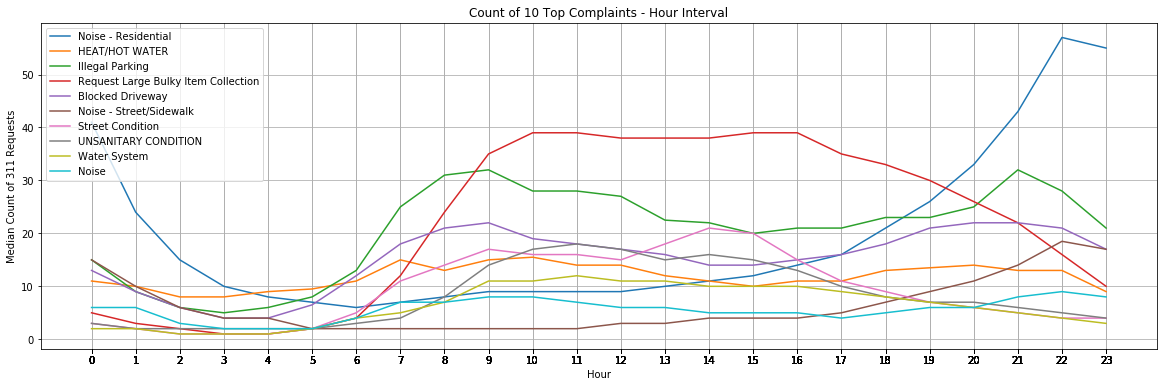

In [80]:
# create simple line plot to visualize the trend

plt.figure(figsize=(20, 6))

for x in top_10.complaint_type:
  filtered_subset = complaint_median_hour[complaint_median_hour.complaint_type == x]
  plt.plot(filtered_subset.hour, filtered_subset.median_requests, label=x)

plt.xticks(complaint_median_hour.hour)
plt.grid()
plt.title('Count of 10 Top Complaints - Hour Interval')
plt.xlabel('Hour')
plt.ylabel('Median Count of 311 Requests')
plt.legend()

**Step 6. Trends by day of week**

Reproduce the steps in 5, but this time aggregate by **weekday**, date, and complaint_type. Produce a similar plot where the x values will be the days of the week and the y values will be the median count of requests per complaint type

In [81]:
complaint_weekday_date = filtered_311.groupby(['weekday', 'date','complaint_type']).size().reset_index(name='count')
complaint_weekday_date.head()

,weekday,date,complaint_type,count
0,0,2018-08-06,Blocked Driveway,373
1,0,2018-08-06,HEAT/HOT WATER,80
2,0,2018-08-06,Illegal Parking,473
3,0,2018-08-06,Noise,108
4,0,2018-08-06,Noise - Residential,303


In [82]:
complaint_median_weekday = complaint_weekday_date.groupby(['complaint_type', 'weekday'])['count'].median().reset_index(name='median_requests')
complaint_median_weekday.head()

,complaint_type,weekday,median_requests
0,Blocked Driveway,0,372.0
1,Blocked Driveway,1,377.0
2,Blocked Driveway,2,363.0
3,Blocked Driveway,3,361.0
4,Blocked Driveway,4,373.0


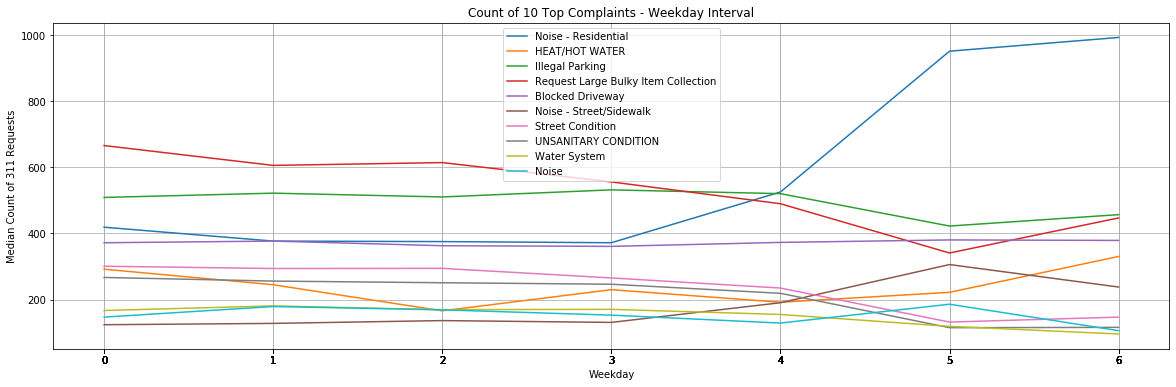

In [83]:
# create simple line plot to visualize the trend

plt.figure(figsize=(20, 6))

for x in top_10.complaint_type:
  filtered_subset_2 = complaint_median_weekday[complaint_median_weekday.complaint_type == x]
  plt.plot(filtered_subset_2.weekday, filtered_subset_2.median_requests, label=x)

plt.xticks(complaint_median_weekday.weekday)
plt.grid()
plt.title('Count of 10 Top Complaints - Weekday Interval')
plt.xlabel('Weekday')
plt.ylabel('Median Count of 311 Requests')
plt.legend()

**Step 7. Trends by month**

Reproduce the steps in 5, but this time aggregate by **month, year** (not date), and complaint_type. Produce a similar plot where x values will days of the week and y values will be the median count of requests per complaint type

In [84]:
complaint_month_year = filtered_311.groupby(['month', 'year','complaint_type']).size().reset_index(name='count')
complaint_month_year.head()

,month,year,complaint_type,count
0,1,2019,Blocked Driveway,11393
1,1,2019,HEAT/HOT WATER,46387
2,1,2019,Illegal Parking,13189
3,1,2019,Noise,4805
4,1,2019,Noise - Residential,16176


In [85]:
complaint_median_month = complaint_month_year.groupby(['complaint_type', 'month'])['count'].median().reset_index(name='median_requests')
complaint_median_month.head()

,complaint_type,month,median_requests
0,Blocked Driveway,1,11393.0
1,Blocked Driveway,2,9906.0
2,Blocked Driveway,3,11582.0
3,Blocked Driveway,4,10360.0
4,Blocked Driveway,5,12125.0


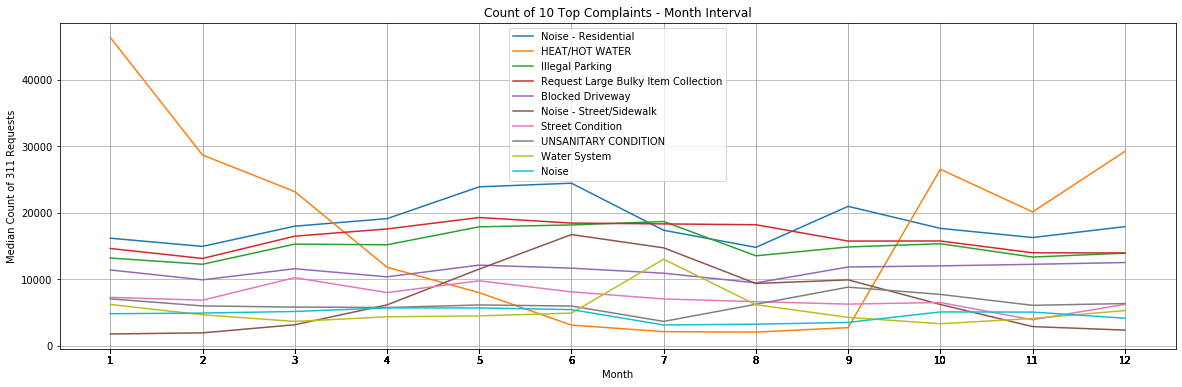

In [86]:
# create simple line plot to visualize the trend

plt.figure(figsize=(20, 6))

for x in top_10.complaint_type:
  filtered_subset_3 = complaint_median_month[complaint_median_month.complaint_type == x]
  plt.plot(filtered_subset_3.month, filtered_subset_3.median_requests, label=x)

plt.xticks(complaint_median_month.month)
plt.grid()
plt.title('Count of 10 Top Complaints - Month Interval')
plt.xlabel('Month')
plt.ylabel('Median Count of 311 Requests')
plt.legend()

**Step 8**. Write a few sentences with your observations on how the occurrence of different complaint types varies over time, informed by the charts you produced in Steps 5-7.

Different kinds of complaingts vary significantly by time, with some complaints varrying more over different time scales. Noise-Residential complaints are most common at night and on the weekends, but they do not vary particularly by month. Heat/Hot Water complaints are most common in the winter. Illegal parking complaints occur most often in the morning when people are starting their commutes and in the evening when people are coming home from work. This is potentially because driveways are blocked. Besides Heat/Hot Water, most complaints don't vary that much by month. People are most likely to Request Large Bulky Item Collection at the beginning of the week, which makes sense given my recent experience requesting a bulky item collection.